<a href="https://colab.research.google.com/github/Elman295/Dog-vs-Cat-Kaggle-/blob/main/Cat_vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
! cp kaggle.json ~/.kaggle/


In [7]:
! kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

100% 813M/814M [00:36<00:00, 25.0MB/s]
100% 814M/814M [00:36<00:00, 23.6MB/s]


In [33]:
import zipfile
import numpy as np
import os 
import matplotlib.pyplot as plt
import shutil


import torch 
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.io import read_image
from torch import nn
import torch.nn.functional as F

In [9]:
with zipfile.ZipFile("dogs-vs-cats-redux-kernels-edition.zip","r") as f:
  f.extractall("data")

In [10]:
data_path = os.path.join("data")
os.listdir(data_path)

['sample_submission.csv', 'test.zip', 'train.zip']

In [11]:
train_path_zip = os.path.join(data_path, "train.zip")
test_path_zip = os.path.join(data_path, "test.zip")

In [12]:
with zipfile.ZipFile(train_path_zip,"r") as train:
  train.extractall("train")

In [13]:
with zipfile.ZipFile(test_path_zip,"r") as test:
  test.extractall("test")

In [14]:
train_path = os.path.join("train","train") 
test_path = os.path.join("test","test")
os.listdir(train_path[:20])

['dog.5646.jpg',
 'dog.9552.jpg',
 'dog.11227.jpg',
 'dog.4293.jpg',
 'dog.5816.jpg',
 'dog.7292.jpg',
 'dog.3528.jpg',
 'cat.4547.jpg',
 'cat.6165.jpg',
 'cat.5922.jpg',
 'cat.7995.jpg',
 'dog.3137.jpg',
 'dog.6307.jpg',
 'cat.6609.jpg',
 'cat.3468.jpg',
 'dog.944.jpg',
 'cat.11191.jpg',
 'dog.5526.jpg',
 'cat.11423.jpg',
 'dog.6356.jpg',
 'dog.4344.jpg',
 'cat.12453.jpg',
 'dog.4187.jpg',
 'cat.11115.jpg',
 'dog.5885.jpg',
 'dog.8541.jpg',
 'cat.3194.jpg',
 'cat.6965.jpg',
 'dog.6205.jpg',
 'dog.11648.jpg',
 'dog.11405.jpg',
 'dog.829.jpg',
 'cat.2917.jpg',
 'dog.9490.jpg',
 'cat.3839.jpg',
 'dog.1190.jpg',
 'dog.4201.jpg',
 'cat.8742.jpg',
 'dog.9005.jpg',
 'cat.8990.jpg',
 'cat.3846.jpg',
 'dog.1148.jpg',
 'cat.12414.jpg',
 'dog.10119.jpg',
 'dog.10596.jpg',
 'dog.1681.jpg',
 'cat.8178.jpg',
 'dog.727.jpg',
 'cat.11917.jpg',
 'dog.7495.jpg',
 'cat.3896.jpg',
 'dog.7358.jpg',
 'dog.2158.jpg',
 'dog.6667.jpg',
 'dog.3868.jpg',
 'cat.7709.jpg',
 'dog.8198.jpg',
 'dog.7211.jpg',
 'cat.

In [15]:
os.listdir(test_path)

['4937.jpg',
 '4067.jpg',
 '3050.jpg',
 '7956.jpg',
 '3502.jpg',
 '11541.jpg',
 '6167.jpg',
 '5486.jpg',
 '1506.jpg',
 '2281.jpg',
 '908.jpg',
 '11583.jpg',
 '2620.jpg',
 '6313.jpg',
 '497.jpg',
 '11423.jpg',
 '9473.jpg',
 '11466.jpg',
 '2459.jpg',
 '9599.jpg',
 '1371.jpg',
 '8247.jpg',
 '216.jpg',
 '8092.jpg',
 '2828.jpg',
 '5691.jpg',
 '702.jpg',
 '12374.jpg',
 '8778.jpg',
 '5611.jpg',
 '6624.jpg',
 '5971.jpg',
 '4664.jpg',
 '8302.jpg',
 '4640.jpg',
 '7293.jpg',
 '3112.jpg',
 '320.jpg',
 '11132.jpg',
 '3508.jpg',
 '5946.jpg',
 '5303.jpg',
 '5783.jpg',
 '4244.jpg',
 '3284.jpg',
 '7578.jpg',
 '9865.jpg',
 '5568.jpg',
 '12395.jpg',
 '374.jpg',
 '88.jpg',
 '9825.jpg',
 '796.jpg',
 '11346.jpg',
 '7759.jpg',
 '11732.jpg',
 '2333.jpg',
 '5650.jpg',
 '5161.jpg',
 '8993.jpg',
 '5346.jpg',
 '1009.jpg',
 '424.jpg',
 '4411.jpg',
 '10411.jpg',
 '385.jpg',
 '3850.jpg',
 '3213.jpg',
 '1745.jpg',
 '8614.jpg',
 '12003.jpg',
 '11864.jpg',
 '7290.jpg',
 '9887.jpg',
 '110.jpg',
 '9009.jpg',
 '5235.jpg',

In [16]:
data = ["dog.1","cat.2","dog.3"]
dog = []
for i in data: 
  if "dog" in i:
    dog.append(i)
print(dog)


['dog.1', 'dog.3']


In [17]:
os.makedirs("Train/dog")
os.makedirs("Train/cat")

In [18]:
for i in os.listdir(train_path):
  if "dog" in i:
    shutil.copy(f"train/train/{i}","Train/dog")
    


os.listdir("Train/dog")

['dog.5646.jpg',
 'dog.9552.jpg',
 'dog.11227.jpg',
 'dog.4293.jpg',
 'dog.5816.jpg',
 'dog.7292.jpg',
 'dog.3528.jpg',
 'dog.3137.jpg',
 'dog.6307.jpg',
 'dog.944.jpg',
 'dog.5526.jpg',
 'dog.6356.jpg',
 'dog.4344.jpg',
 'dog.4187.jpg',
 'dog.5885.jpg',
 'dog.8541.jpg',
 'dog.6205.jpg',
 'dog.11648.jpg',
 'dog.11405.jpg',
 'dog.829.jpg',
 'dog.9490.jpg',
 'dog.1190.jpg',
 'dog.4201.jpg',
 'dog.9005.jpg',
 'dog.1148.jpg',
 'dog.10119.jpg',
 'dog.10596.jpg',
 'dog.1681.jpg',
 'dog.727.jpg',
 'dog.7495.jpg',
 'dog.7358.jpg',
 'dog.2158.jpg',
 'dog.6667.jpg',
 'dog.3868.jpg',
 'dog.8198.jpg',
 'dog.7211.jpg',
 'dog.11129.jpg',
 'dog.3733.jpg',
 'dog.2161.jpg',
 'dog.1205.jpg',
 'dog.3876.jpg',
 'dog.1784.jpg',
 'dog.8862.jpg',
 'dog.4598.jpg',
 'dog.10232.jpg',
 'dog.12223.jpg',
 'dog.11532.jpg',
 'dog.8672.jpg',
 'dog.4331.jpg',
 'dog.2450.jpg',
 'dog.978.jpg',
 'dog.7128.jpg',
 'dog.4386.jpg',
 'dog.3293.jpg',
 'dog.4722.jpg',
 'dog.8167.jpg',
 'dog.2652.jpg',
 'dog.2288.jpg',
 'dog.377

In [19]:
for i in os.listdir(train_path):
  if "cat" in i:
    shutil.copy(f"train/train/{i}","Train/cat")
    


os.listdir("Train/cat")

['cat.4547.jpg',
 'cat.6165.jpg',
 'cat.5922.jpg',
 'cat.7995.jpg',
 'cat.6609.jpg',
 'cat.3468.jpg',
 'cat.11191.jpg',
 'cat.11423.jpg',
 'cat.12453.jpg',
 'cat.11115.jpg',
 'cat.3194.jpg',
 'cat.6965.jpg',
 'cat.2917.jpg',
 'cat.3839.jpg',
 'cat.8742.jpg',
 'cat.8990.jpg',
 'cat.3846.jpg',
 'cat.12414.jpg',
 'cat.8178.jpg',
 'cat.11917.jpg',
 'cat.3896.jpg',
 'cat.7709.jpg',
 'cat.10807.jpg',
 'cat.6559.jpg',
 'cat.9317.jpg',
 'cat.9243.jpg',
 'cat.9375.jpg',
 'cat.144.jpg',
 'cat.1360.jpg',
 'cat.5605.jpg',
 'cat.4624.jpg',
 'cat.12103.jpg',
 'cat.8409.jpg',
 'cat.11383.jpg',
 'cat.10502.jpg',
 'cat.3407.jpg',
 'cat.10640.jpg',
 'cat.10590.jpg',
 'cat.12199.jpg',
 'cat.11288.jpg',
 'cat.5049.jpg',
 'cat.689.jpg',
 'cat.4256.jpg',
 'cat.3664.jpg',
 'cat.6437.jpg',
 'cat.8949.jpg',
 'cat.5603.jpg',
 'cat.10925.jpg',
 'cat.5764.jpg',
 'cat.5465.jpg',
 'cat.8052.jpg',
 'cat.4569.jpg',
 'cat.3524.jpg',
 'cat.7198.jpg',
 'cat.3760.jpg',
 'cat.1815.jpg',
 'cat.1014.jpg',
 'cat.6546.jpg',
 

In [20]:
tfms = transforms.Compose([
    transforms.Resize(size = (200,200)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize(mean = (0.5,0.5,0.5), std = (0.5,0.5,0.5))
])

training_data = datasets.ImageFolder(
    root = "Train",
    transform=tfms 
)



In [21]:
training_data.class_to_idx

{'cat': 0, 'dog': 1}

In [22]:
train_dataloader = DataLoader(dataset = training_data, batch_size = 32, shuffle  =True) 

In [24]:
train_dataloader.dataset

Dataset ImageFolder
    Number of datapoints: 25000
    Root location: Train
    StandardTransform
Transform: Compose(
               Resize(size=(200, 200), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-20.0, 20.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [25]:
images, targets = next(iter(train_dataloader))
print(images.shape)
print(images.dtype)

torch.Size([32, 3, 200, 200])
torch.float32


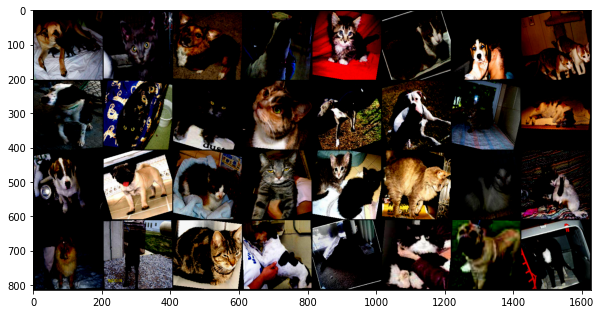

In [26]:
plt.figure(figsize = (10,10))
out = torchvision.utils.make_grid(tensor = (images), padding = 3) 
plt.imshow(np.transpose(out,(1,2,0)))
plt.show()

In [27]:
class CNN(nn.Module):

  def __init__(self):
    super(CNN, self).__init__()

    self.main_1 = nn.Sequential(
        nn.Conv2d(3,16,5,1,0),
        nn.BatchNorm2d(16),
        nn.ReLU()
    )

    self.main_2 = nn.Sequential(
        
        nn.Conv2d(16,64,5,1,0),
        nn.BatchNorm2d(64),
        nn.ReLU()
    )
    self.main_3 = nn.Sequential(
        
        nn.Conv2d(64,128,5,2,0),
        nn.BatchNorm2d(128),
        nn.ReLU()
    )

    self.pool_1 = nn.MaxPool2d(2) 
    self.pool_2 = nn.MaxPool2d(2) 
    self.pool_3 = nn.MaxPool2d(2) 

    self.d1 = nn.Linear(11*11*128,128)
    self.d2 = nn.Linear(128,2)

  def forward(self,x):

    x = self.pool_1(self.main_1(x))
    x = self.pool_2(self.main_2(x))
    x = self.pool_3(self.main_3(x))
    x = torch.flatten(x,1)
    x = F.relu(self.d1(x))
    logits = self.d2(x)
    return logits

In [28]:
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

In [29]:
model = CNN()
model.to(device) 



CNN(
  (main_1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (main_2): Sequential(
    (0): Conv2d(16, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (main_3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(5, 5), stride=(2, 2))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (pool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool_2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool_3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (d1): Linear(in_features=15488, out_features=128, bias=True)
  (d2): Linear(in_features=128, out_features=2, bias=True)
)

In [30]:
loss_function = nn.CrossEntropyLoss()
optim = torch.optim.Adam(params = model.parameters(), lr = 1e-3)

In [31]:
def train(dataloader, model, loss_fn, optim_fn):
  size = len(dataloader.dataset)
  for batch, (x,y) in enumerate(dataloader):
    x,y = x.to(device),y.to(device)
    y_pred = model(x)
    loss = loss_fn(y_pred, y)

    optim_fn.zero_grad()
    loss.backward()
    optim_fn.step() 

    if batch % 100 == 0:
      loss, current = loss.item(), batch*len(x) 
      print(f"loss:[{loss}]======[{current}/ {size}]")

In [32]:
EPOCHS = 25 

for epoch in range(EPOCHS):
  print(f"epoch: {epoch+1} -=-=-=-=-=-=-=-=-=-=-=-=-=")
  train(train_dataloader, model, loss_function, optim)
print("DONE!!!")

epoch: 1 -=-=-=-=-=-=-=-=-=-=-=-=-=
loss:[0.6974971294403076]======[0/ 25000]
loss:[0.7478892207145691]======[3200/ 25000]
loss:[0.609375536441803]======[6400/ 25000]
loss:[0.606028139591217]======[9600/ 25000]
loss:[0.7130408883094788]======[12800/ 25000]
loss:[0.6119211316108704]======[16000/ 25000]
loss:[0.5364523530006409]======[19200/ 25000]
loss:[0.3938727080821991]======[22400/ 25000]
epoch: 2 -=-=-=-=-=-=-=-=-=-=-=-=-=
loss:[0.518467366695404]======[0/ 25000]
loss:[0.6994611024856567]======[3200/ 25000]
loss:[0.5129470229148865]======[6400/ 25000]
loss:[0.4945935010910034]======[9600/ 25000]
loss:[0.5291039943695068]======[12800/ 25000]
loss:[0.6131387948989868]======[16000/ 25000]
loss:[0.4108172357082367]======[19200/ 25000]
loss:[0.5636882185935974]======[22400/ 25000]
epoch: 3 -=-=-=-=-=-=-=-=-=-=-=-=-=
loss:[0.5654779672622681]======[0/ 25000]
loss:[0.39981526136398315]======[3200/ 25000]
loss:[0.4729183614253998]======[6400/ 25000]
loss:[0.7343763709068298]======[9600/ 25